In [166]:
from imports import *
from tools import *

In [167]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue_wclusters_wprops.fits' %root_dir)

In [168]:
t_mcload21 = QTable.read('/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/pressures_literature/McLeod2021_ngc300/McLeod2021_ngc300.fits')
t_mcload21

Id,Coordinates,Rgal_r25,radius,met,met err,log([NII]/Ha),log([NII]/Ha) err,log([OIII]/Hb),log([OIII]/Hb) err,log([SII]/Ha),log([SII]/Ha) err,pdir,pdir_err,pth,pth_err,n[NII],n[NII] err,S32,S32 err
,,,pc,,,,,,,,,K / cm3,K / cm3,K / cm3,K / cm3,,,,
int64,bytes17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9,13.70028-37.72589,0.3,9.33,8.38,0.0,-0.8,0.01,-0.03,0.03,-0.68,0.01,4.47,0.01,6.44,0.07,0.12,0.03,-0.62,0.09
10,13.6782-37.71524,0.31,78.44,8.4,0.0,-0.75,0.01,-0.11,0.04,-0.45,0.01,4.41,0.01,6.06,0.04,0.08,0.02,-0.94,0.12
11,13.66255-37.70863,0.35,70.09,8.38,0.01,-0.78,0.01,-0.12,0.06,-0.39,0.01,3.84,0.02,5.99,0.03,0.08,0.04,-0.92,0.18
43,13.72267-37.72879,0.29,60.67,8.41,0.0,-0.73,0.01,-0.12,0.03,-0.41,0.01,4.51,0.01,6.1,0.04,0.1,0.02,-0.84,0.08
47,13.72524-37.73352,0.32,17.99,8.44,0.01,-0.66,0.02,-0.35,0.11,-0.31,0.02,4.02,0.02,5.89,0.02,0.15,0.09,-0.96,0.22
61,13.74333-37.73854,0.37,22.99,8.39,0.01,-0.77,0.02,-0.72,0.21,-0.43,0.02,3.99,0.02,4.91,———,0.22,0.21,-1.05,0.35
75,13.71703-37.72884,0.29,12.24,8.43,0.01,-0.68,0.02,-0.36,0.13,-0.3,0.02,3.78,0.03,6.03,0.04,0.11,0.09,-1.08,0.31
99,13.74963-37.73783,0.38,25.31,8.36,0.0,-0.84,0.01,0.2,0.02,-0.55,0.01,4.65,0.01,5.98,0.03,0.07,0.01,-0.61,0.08


In [169]:
mask = table['reg_dolflux_Age_MinChiSq'] <= 5*u.Myr
table = table[mask]

radius_circ_pc  = table['radius_circ_pc']
radius_mom_pc   = table['mean_sigma_pc']
radius_strom_pc = table['radius_strom_pc']

Pdir_circ  = np.log10(table['Pdir_circ'].value)
Pdir_mom   = np.log10(table['Pdir_mom'].value)
Pdir_strom = np.log10(table['Pdir_strom'].value) 
Ptherm     = np.log10(table['Ptherm'].value)

Pdir_circ_Lbol_KE12  = np.log10(table['Pdir_circ_Lbol_KE12'].value)
Pdir_circ_Lbol_B21  = np.log10(table['Pdir_circ_Lbol_B21'].value)

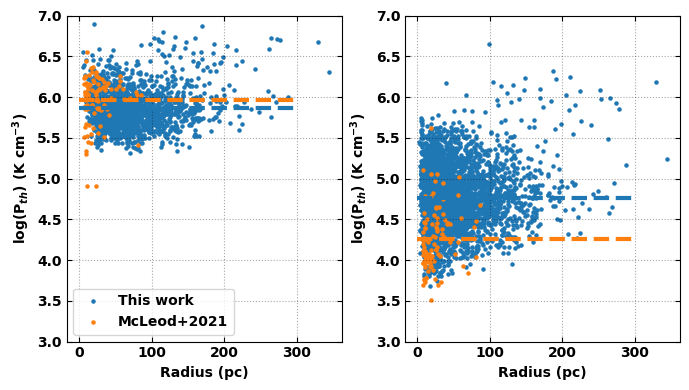

In [170]:
fig = plt.figure(figsize=(7, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(radius_circ_pc, Ptherm, label='This work', s=5)
ax1.scatter(t_mcload21['radius'].value, t_mcload21['pth'].value, label='McLeod+2021', s=5)
ax1.plot([0,300], [np.nanmean(Ptherm), np.nanmean(Ptherm)], ls='--', lw=3, c='C0')
ax1.plot([0,300], [np.nanmean(t_mcload21['pth'].value), np.nanmean(t_mcload21['pth'].value)], ls='--', lw=3, c='C1')

ax2.scatter(radius_circ_pc, Pdir_circ, s=5)
ax2.scatter(t_mcload21['radius'].value, t_mcload21['pdir'].value, s=5)
ax2.plot([0,300], [np.nanmean(Pdir_circ), np.nanmean(Pdir_circ)], ls='--', lw=3, c='C0')
ax2.plot([0,300], [np.nanmean(t_mcload21['pdir'].value), np.nanmean(t_mcload21['pdir'].value)], ls='--', lw=3, c='C1')

for ax in [ax1, ax2]:
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.set_ylim(3, 7)
    ax.set_xlabel('Radius (pc)')
    ax.set_ylabel('log(P$_{th}$) (K cm$^{-3}$)')

ax1.legend()
fig.tight_layout(h_pad=0.5, w_pad=0.5)

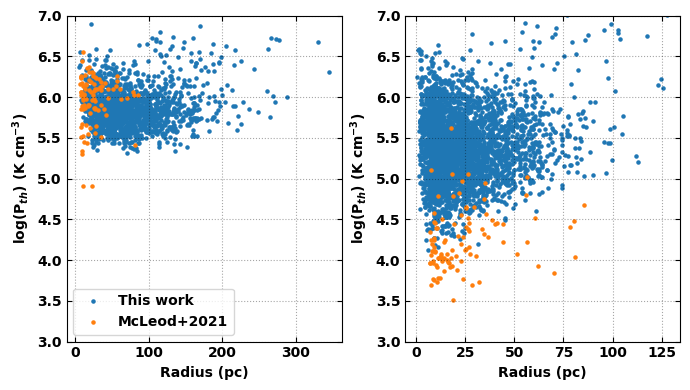

In [173]:
fig = plt.figure(figsize=(7, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(radius_circ_pc, Ptherm, label='This work', s=5)
ax1.scatter(t_mcload21['radius'].value, t_mcload21['pth'].value, label='McLeod+2021', s=5)

ax2.scatter(radius_mom_pc, Pdir_mom, s=5)
ax2.scatter(t_mcload21['radius'].value, t_mcload21['pdir'].value, s=5)

for ax in [ax1, ax2]:
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.set_ylim(3, 7)
    ax.set_xlabel('Radius (pc)')
    ax.set_ylabel('log(P$_{th}$) (K cm$^{-3}$)')

ax1.legend()
fig.tight_layout(h_pad=0.5, w_pad=0.5)

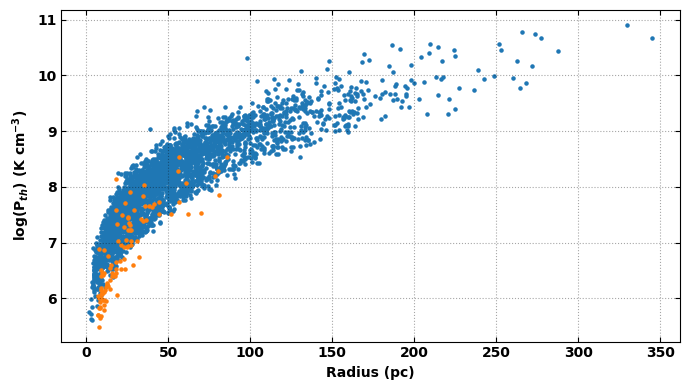

In [171]:
fig = plt.figure(figsize=(7, 4)) 
ax = fig.add_subplot(111)

Pdir_circ_adj = np.log10((10**Pdir_circ_Lbol_KE12) * radius_circ_pc.value**2)
Pdir_circ_adj_mcload21 = np.log10((10**t_mcload21['pdir'].value) * t_mcload21['radius'].value**2)

ax.scatter(radius_circ_pc, Pdir_circ_adj, s=5)
ax.scatter(t_mcload21['radius'].value, Pdir_circ_adj_mcload21, s=5)

ax.grid(True, alpha=0.35, ls=':', color='black')
# ax.set_ylim(3, 7)
ax.set_xlabel('Radius (pc)')
ax.set_ylabel('log(P$_{th}$) (K cm$^{-3}$)')

ax1.legend()
fig.tight_layout(h_pad=0.5, w_pad=0.5)

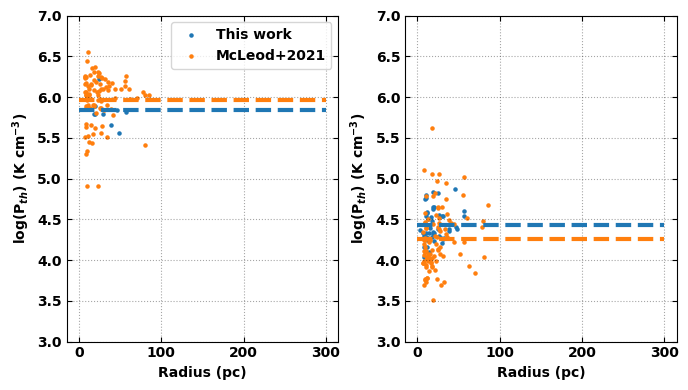

In [172]:
mask = table['gal_name'] == 'IC5332'

fig = plt.figure(figsize=(7, 4)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(radius_circ_pc[mask], Ptherm[mask], label='This work', s=5)
ax1.scatter(t_mcload21['radius'].value, t_mcload21['pth'].value, label='McLeod+2021', s=5)
ax1.plot([0,300], [np.nanmean(Ptherm[mask]), np.nanmean(Ptherm[mask])], ls='--', lw=3, c='C0')
ax1.plot([0,300], [np.nanmean(t_mcload21['pth'].value), np.nanmean(t_mcload21['pth'].value)], ls='--', lw=3, c='C1')

ax2.scatter(radius_circ_pc[mask], Pdir_circ[mask], s=5)
ax2.scatter(t_mcload21['radius'].value, t_mcload21['pdir'].value, s=5)
ax2.plot([0,300], [np.nanmean(Pdir_circ[mask]), np.nanmean(Pdir_circ[mask])], ls='--', lw=3, c='C0')
ax2.plot([0,300], [np.nanmean(t_mcload21['pdir'].value), np.nanmean(t_mcload21['pdir'].value)], ls='--', lw=3, c='C1')

for ax in [ax1, ax2]:
    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.set_ylim(3, 7)
    ax.set_xlabel('Radius (pc)')
    ax.set_ylabel('log(P$_{th}$) (K cm$^{-3}$)')
    
ax1.legend()
fig.tight_layout(h_pad=0.5, w_pad=0.5)